<a href="https://colab.research.google.com/github/Lucecpkn/Tutorials/blob/master/WebDataExtraction_Pan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to BeatifulSoup

Beautiful Soup is a popular Python library for pulling data out of HTML files. Today we will learn to use some of its basic functions.  
To know more, you can refer to its [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#).

### Python notebook



In [0]:
print("hello world")   ## this is a code block

hello world


### Example: get HEC faculty list
We want to get the data of all faculty names of HEC.

Packages we will use:

In [0]:
from bs4 import BeautifulSoup
import requests

#### 1. Get the HTML of the webpage.

Get the html source file of the [webpage](https://www.hec.ca/en/profs/profs.html):

In [0]:
url = 'https://www.hec.ca/en/profs/profs.html'
source = requests.get(url).text  # source is a html
soup = BeautifulSoup(source)  # soup is a tree
print(soup.prettify())

#### 2. Locate the target information:

The html in the text format seems messy. It's hard to locate information in it.  
Luckily we don't have to, thanks to the browsers.

To view the source code of a page, use the `Developer Tools` of the browser.  

Ex.  
For **Chrome**:  `Setting --> More tools --> Developer Tools`.  
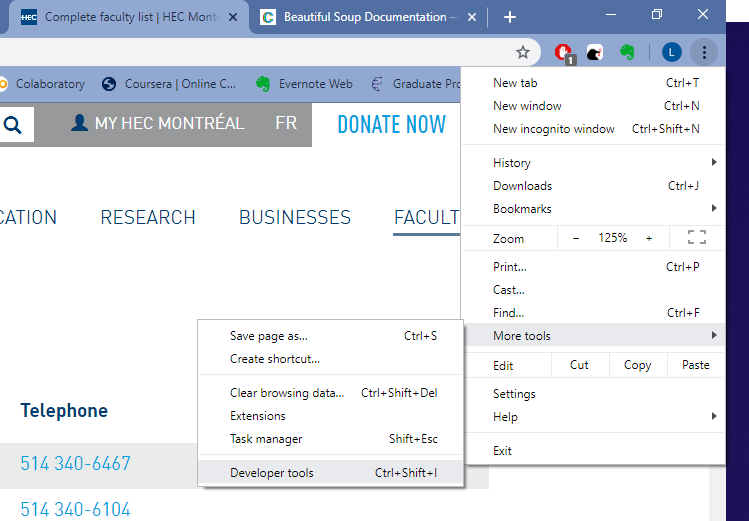

For **Safari**, you first need to enable the Developer menu:
- Click on Safari menu > Preferences > Advanced.
- Check "Show Develop menu in menu bar".
- Close the Preferences window.
- Go to the Develop menu > Show Page Source

Now you should be able to locate elements which contain the target information.

Here in our example, we find that the info we need is in the elements of type \<a class="hTypeMenu"> within the element \<div class_='ALBOfProfs'>.

#### 3. Extract the information

First, we narrow down to the table element containing all info, using the function `find()`:

In [0]:
table = soup.find('div', class_='ALBOfProfs')

Then, we extract all the rows using the function `find_all()`:



In [0]:
## each row contains info of a prof
rows = table.find_all("div", class_="row")

The names are found in the first \<a class="hTypeMenu"> element of each row:

`element.text` will return the content of each element:

In [0]:
for row in rows:
  name = row.find("a", class_="hTypeMenu").text
  print(name)

Aboul-Enein, Shady
Abraham, Yves-Marie
Adulyasak, Yossiri
AgoguÃ©, Marine
Aguilar Delgado, Natalia
Ahmadsimab, Alireza
Aktouf, Omar
Albert, Marie-Christine
Allain, Ãlodie
Allard, Marie-HÃ©lÃ¨ne
Ananou, Claude
Arcand, SÃ©bastien
Ardia, David
Arslan, Okan
AubÃ©, Caroline
Audette, Sylvain M.
Avis, Eric
Babin, Gilbert
Bahn, Olivier
Balloffet, Pierre
Bareil, CÃ©line
BarÃ¨s, Franck 
Baribeault, Charles
Barin Cruz, Luciano
Barnea, Amir 
Beaudoin, Claude
BÃ©langer, Carol
BÃ©langer, ValÃ©rie
BÃ©langer-Martin, Luc
Bellavance, FranÃ§ois
Belzile, Germain
Belzile, LÃ©o
Ben Ameur, Hatem
Betschinger, Marie-Ann
Blain, Richard
Boisvert, Nathalie
Bouakez, Hafedh
Bouchard, Philippe
Bougie, Jacques
Bourgoin, Alaric
Bourhis, Anne
Boyer, Martin
Bozec, Yves
Brat, Ãric
Breton, MichÃ¨le
BriÃ¨re, Yannick
Brouillette, Marie-Claude
Brunelle, Eric
Brunet, Fabrice
Brunet, Johanne
Brunet, Maude
Cacciatore, Matteo
Cameron, Ann-Frances
Candian, Giacomo
Caporossi, Gilles
Caron, Justin
Cauchon, Denis
Cenesizoglu, Tolg

That's it, we get all the names of professors!

#### 4. Output data

Additionally, you can export the data.

In [0]:
names = []  ## initiate an empty list to store the names.
for row in rows:
  name = row.find("a", class_="hTypeMenu").text
  names.append(name)  ## add each name to the list

In [0]:
import pandas as pd
df_names = pd.DataFrame(names)

In [0]:
print(df_names)

                            0
0          Aboul-Enein, Shady
1         Abraham, Yves-Marie
2          Adulyasak, Yossiri
3             AgoguÃ©, Marine
4    Aguilar Delgado, Natalia
5         Ahmadsimab, Alireza
6                Aktouf, Omar
7     Albert, Marie-Christine
8             Allain, Ãlodie
9      Allard, Marie-HÃ©lÃ¨ne
10             Ananou, Claude
11         Arcand, SÃ©bastien
12               Ardia, David
13               Arslan, Okan
14            AubÃ©, Caroline
15        Audette, Sylvain M.
16                 Avis, Eric
17             Babin, Gilbert
18              Bahn, Olivier
19          Balloffet, Pierre
20            Bareil, CÃ©line
21            BarÃ¨s, Franck 
22        Baribeault, Charles
23        Barin Cruz, Luciano
24              Barnea, Amir 
25           Beaudoin, Claude
26           BÃ©langer, Carol
27        BÃ©langer, ValÃ©rie
28      BÃ©langer-Martin, Luc
29      Bellavance, FranÃ§ois
..                        ...
296             Tams , Stefan
297       

In [0]:
from google.colab import files
df_names.to_csv('df_names.csv')
files.download('df_names.csv')3333333

## Some useful resource for learning

Inro to HTML: https://www.codecademy.com/learn/learn-html/modules/learn-html-elements .  
BeautifulSoup documents: https://www.crummy.com/software/BeautifulSoup/bs4/doc/# .